# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Initialization

In [27]:
# Loading all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings



### Load data

In [28]:
# Load the data file into a DataFrame


df = pd.read_csv('/datasets/vehicles_us.csv')




### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [29]:
# print the general/summary information about the DataFrame

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [30]:
# print a sample of data

df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


There are 51525 entries in this dataset. Several columns contain missing values. There are 4 columns that contain float64 datatypes. The date_posted column contains string values instead of a datetime object.

Missing values within the model_year, cylinders, odometer, paint color, and is_4wd columns. These missing values may affect our analysis. The is_4wd column contains the most missing values with about half of the total entries.  

### Conclusions and further steps





According to the column descriptions, the is_4wd column is whether the vehicle has 4-wheel drive (Boolean type). If a Boolean field contains only True or 1 values, it's reasonable to assume that the missing values are False or 0. The percentage of missing values in cylinders is 7%, which is insignificant so they will be dropped. Similarly, the percentage of missing values in model_year is 11%, so they will be dropped. The odometer column will be filled in using the average value per model_year.

In [31]:
# Reviewer's code

pd.DataFrame(df.isna().mean().round(4)*100).style.background_gradient('coolwarm')

,0
price,0
model_year,7.02
model,0
condition,0
cylinders,10.21
fuel,0
odometer,15.32
transmission,0
type,0
paint_color,17.99


## Treat missing values (if any)

In [32]:
# Filling missing values in the is_4wd column with 0
df['is_4wd'] = df['is_4wd'].fillna(0)


# Dropping missing values in the cylinders column
print('Missing cylinder values percentage:',df.cylinders.isnull().sum() / df.cylinders.count() * 100) 
df.cylinders.dropna(inplace=True)
print(df.cylinders.isna().sum())

print()

# Finding percentage of missing values in model_year column
print('Missing model_year percentage:',(df.model_year.isnull().sum() / df.model_year.count()) *100)


# Dropping missing values in model_year column 
df['model_year'].dropna(inplace=True)
print(df['model_year'].isna().sum())


# Filling missing values in the odometer column with the average mileage per model_year
df['odometer'].fillna(df.groupby('model_year')['odometer'].transform('mean'),inplace=True)
df.odometer.dropna(inplace=True)
print()
df.info()



Missing cylinder values percentage: 11.369285637090673
0

Missing model_year percentage: 7.5543773222560855
0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50975 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.0+ MB


## Fix data types

In [33]:
# Turning float datatypes into int64

df.info()
df.model_year.dropna(inplace=True)
convert_dict = {'is_4wd': bool, 'cylinders': int,'model_year':int,'odometer':int}

print()
df = df.astype(convert_dict)
df.info()

# Not sure why some colummns datatypes did not change

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50975 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.0+ MB

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null o

## Enrich data

In [34]:
# Add datetime values for when the ad was placed

df['date_posted']= pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df['date_posted'].head()



0   2018-06-23
1   2018-10-19
2   2019-02-07
3   2019-03-22
4   2019-04-02
Name: date_posted, dtype: datetime64[ns]

In [35]:
# Add the vehicle's age when the ad was placed
df['year_posted'] = pd.DatetimeIndex(df['date_posted']).year
df['vehicle_age'] = df['year_posted'] - df['model_year']
df['vehicle_age'].head()


# Percent of vehicle_age values that are equal to 0

(df.vehicle_age==0).sum() / df.vehicle_age.count() * 100


4.442032313280174

In [36]:

# Removing 0 values from vehicle_age because vehicle_age is the divisor
df.vehicle_age = df.vehicle_age.loc[df.vehicle_age != 0]

# Add the vehicle's average mileage per year

df['avg_mileage'] = df['odometer'] / df['vehicle_age']
df.avg_mileage.dropna(inplace=True)
df.avg_mileage.head(5)
df.avg_mileage.describe()


count     45777.000000
mean      17798.379060
std       12344.426037
min           0.000000
25%       10854.285714
50%       15118.833333
75%       21002.142857
max      279365.000000
Name: avg_mileage, dtype: float64

In [37]:
# Reviewer's code

# Second way:
labels = df['condition'].astype('category').cat.categories.tolist()
replace_dict = {'condition' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

replace_dict

{'condition': {'excellent': 1,
  'fair': 2,
  'good': 3,
  'like new': 4,
  'new': 5,
  'salvage': 6}}

In [38]:
# It might help to replace the condition values with something that can be manipulated more easily
df.condition.value_counts()
df.condition = df.condition.replace({'new':5,'like new':4,'excellent':3,'good':2,'fair':1,'salvage':0})
df.condition.value_counts()




3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64

## Check clean data

In [39]:
# print the general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51525 entries, 0 to 51524
Data columns (total 16 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null int64
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        50975 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          51525 non-null bool
date_posted     51525 non-null datetime64[ns]
days_listed     51525 non-null int64
year_posted     51525 non-null int64
vehicle_age     45778 non-null float64
avg_mileage     45777 non-null float64
dtypes: bool(1), datetime64[ns](1), float64(5), int64(4), object(5)
memory usage: 6.3+ MB


In [40]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,year_posted,vehicle_age,avg_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,True,2018-06-23,19,2018,7.0,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,2018,NaN,NaN
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,162071.0,automatic,pickup,NaN,False,2019-03-22,9,2019,16.0,10129.437500
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2019,2.0,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,2018,4.0,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,2018,3.0,26404.000000
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,True,2019-01-07,68,2019,6.0,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,True,2018-07-16,19,2018,6.0,17362.333333
9,9200,2008.0,honda pilot,3,NaN,gas,147191.0,automatic,SUV,blue,True,2019-02-15,17,2019,11.0,13381.000000


## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [41]:
# Price
core_df = df[['price','vehicle_age','avg_mileage','cylinders','condition','type','transmission','paint_color','days_listed']]

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64



Text(0.5, 0, 'Price')

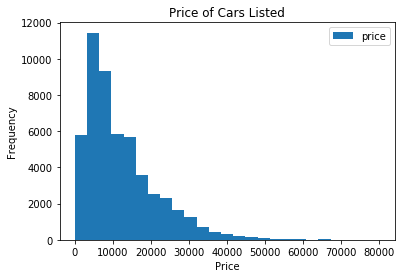

In [42]:
# Price
print(core_df.price.describe())
print()


core_df.plot(kind='hist',y='price',bins = 25, range=(0,80000),title='Price of Cars Listed').set_xlabel("Price")



According to this histogram, a majority of the vehicles listed are less than are equal to $10000.

count    45778.000000
mean         8.954738
std          6.157160
min          1.000000
25%          4.000000
50%          8.000000
75%         12.000000
max        110.000000
Name: vehicle_age, dtype: float64



Text(0.5, 0, 'Vehicle Age')

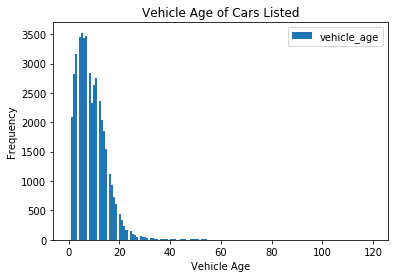

In [43]:
# Vehicle age when posted
print(core_df.vehicle_age.describe())
print()
core_df.plot(kind='hist',y='vehicle_age',bins=150,range=(0,120),title='Vehicle Age of Cars Listed').set_xlabel('Vehicle Age')


According to this histogram, a majority of the vehicles that are advertised are between 0-20 years old.

count     45777.000000
mean      17798.379060
std       12344.426037
min           0.000000
25%       10854.285714
50%       15118.833333
75%       21002.142857
max      279365.000000
Name: avg_mileage, dtype: float64


Text(0.5, 0, 'Average Mileage')

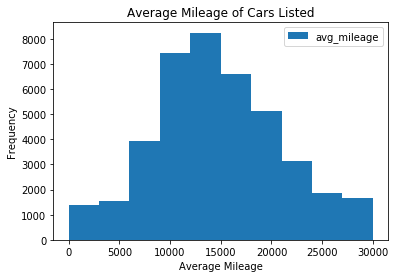

In [44]:
# Mileage
print(core_df.avg_mileage.describe())
core_df.plot(kind='hist',y='avg_mileage',bins=10,range=(0,30000),title='Average Mileage of Cars Listed').set_xlabel('Average Mileage')



According to this histogram, a majority of cars listed have a mileage between 10000-15000.

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64


Text(0.5, 0, 'Cylinders')

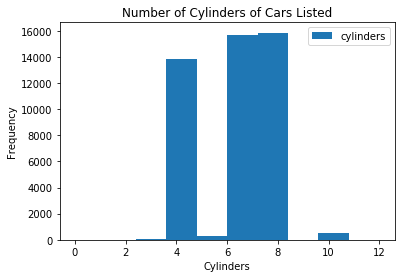

In [45]:
# Cylinders

# Removing 0 values from cylinders column that were used to fill in missing values
core_df = df.query('cylinders != 0')

print(core_df.cylinders.value_counts())
core_df.plot(kind='hist',y='cylinders',bins=10,range=(0,12),title='Number of Cylinders of Cars Listed').set_xlabel('Cylinders')





According to this histogram, most vehicles listed are 4,6, or 8 cylinder vehicles.

3    24773
2    20145
4     4742
1     1607
5      143
0      115
Name: condition, dtype: int64


Text(0.5, 0, 'Condition')

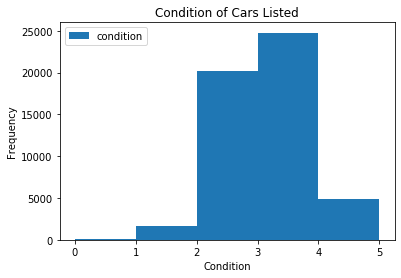

In [46]:
# Condition
print(core_df.condition.value_counts())
core_df.plot(kind='hist',y='condition',bins=5,range=(0,5),title='Condition of Cars Listed').set_xlabel('Condition')


According to this histogram, a majority of the vehicles listed are of good(2) or excellent(3) quality. 

## Study and treat outliers


In [47]:
# Determine the lower limits for outliers
# IQR = Q3 – Q1
# lower = Q1 – 1.5*IQR


core_df.describe()

price_iqr = (16839 - 5000)
price_lower = 5000 - (1.5 * price_iqr)
print(price_lower)




-12758.5


In [48]:
# Determine the upper limits for outliers
# IQR = Q3 – Q1
# upper = Q3 +1.5*IQR

price_iqr = (16839 - 5000)
price_upper = 16839 + (1.5 *price_iqr)
print(price_upper)

vehicle_age_upper = 14 + (1.5 * 9)
print(vehicle_age_upper)








34597.5
27.5


In [49]:
# Store data without outliers in a separate DataFrame using .query()


filtered_df = core_df.query('price <= @price_upper & vehicle_age <= @vehicle_age_upper & avg_mileage < 150000')
filtered_df = filtered_df.query('odometer <= 350000 & price >= 1000')

# Check data for outliers

filtered_df[['price', 'vehicle_age', 'odometer', 'avg_mileage']].describe().loc[['min', 'max']]


,price,vehicle_age,odometer,avg_mileage
min,1000.0,1.0,0.0,0.0
max,34595.0,27.0,350000.0,143905.0


In [50]:
# Reviewer's code

filtered_df[['price', 'vehicle_age', 'odometer', 'avg_mileage']].describe().loc[['min', 'max']]

,price,vehicle_age,odometer,avg_mileage
min,1000.0,1.0,0.0,0.0
max,34595.0,27.0,350000.0,143905.0


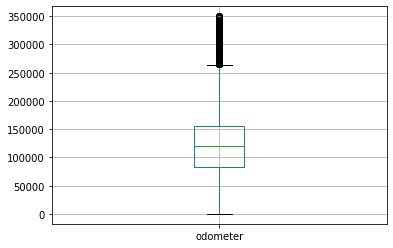

In [51]:
# Reviwer's code

filtered_df.boxplot('odometer')

## Study core parameters without outliers

count    43241.000000
mean     11138.147291
std       7487.615146
min       1000.000000
25%       5200.000000
50%       8995.000000
75%      15498.000000
max      34595.000000
Name: price, dtype: float64


count    43241.000000
mean         8.753382
std          5.172608
min          1.000000
25%          5.000000
50%          8.000000
75%         12.000000
max         27.000000
Name: vehicle_age, dtype: float64


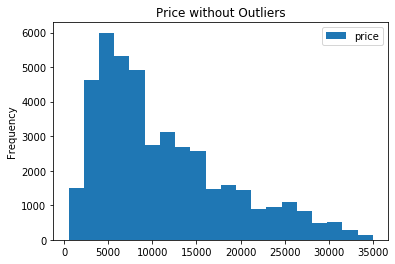

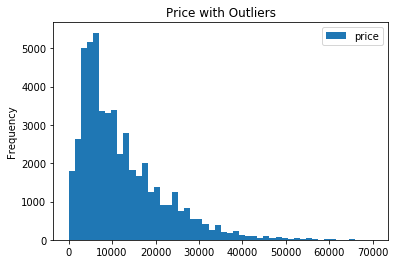

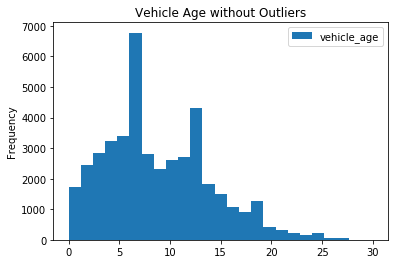

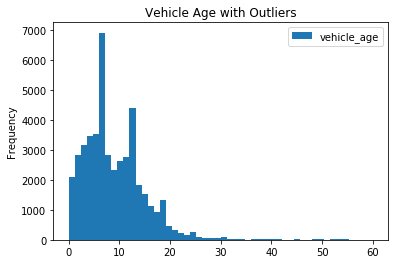

In [52]:
# Price comparison
print(filtered_df.price.describe())

filtered_df.plot(kind='hist',y='price',bins=20,range=(500,35000),title='Price without Outliers')
core_df.plot(kind='hist',y='price',bins = 50, range=(0,70000),title='Price with Outliers')

print()

# Vehicle age comparison

print()
print(filtered_df.vehicle_age.describe())
filtered_df.plot(kind='hist',y='vehicle_age',bins=25,range=(0,30),title='Vehicle Age without Outliers')
core_df.plot(kind='hist',y='vehicle_age',bins = 50, range=(0,60),title='Vehicle Age with Outliers')







The histograms with or without outliers seem to be very similar, with almost identical peaks.


# Conclusion

## Ads lifetime


count    43241.000000
mean        39.580236
std         28.229487
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)

Median days listed: 33.0 
 Average days listed: 39.580236349760646


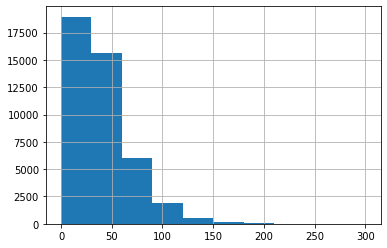

In [53]:
print(filtered_df.days_listed.describe())
print(filtered_df.days_listed.hist(range=(0,300)))
print()
print('Median days listed:',filtered_df.days_listed.median(),'\n','Average days listed:',filtered_df.days_listed.mean())


Vehicles that are listed for more than 150 days are rare and at around 200 days the histogram zeroes out. The average amount of days listed is about 40 days.

## Average price per each type of vehicle

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

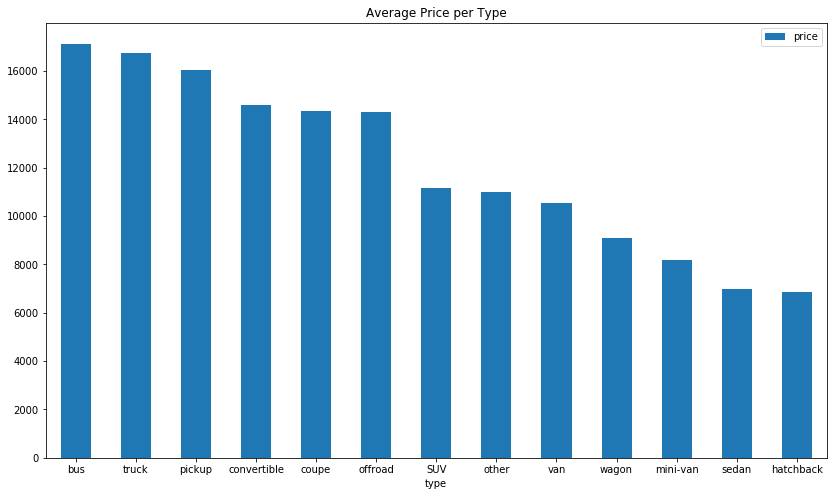

In [54]:
# Creating pivot table and bar graph for type and price

avg_price_type = df.pivot_table(index='type',values='price')


avg_price_type.sort_values('price',ascending=False).plot(kind='bar',title='Average Price per Type',figsize=(14,8))
plt.xticks(rotation=0)



AxesSubplot(0.125,0.125;0.775x0.755)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

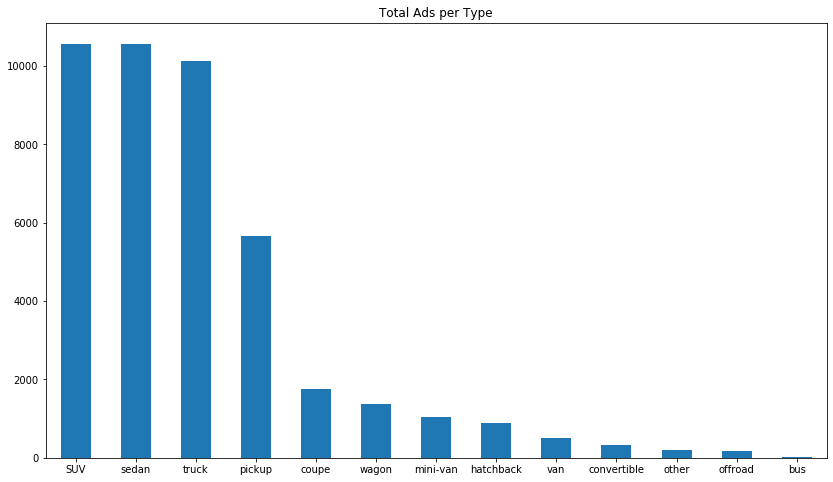

In [55]:
# Creating bar graph to find most popular type of vehicle

total_ads_type = filtered_df['type'].value_counts()
print(total_ads_type.plot(kind='bar',title='Total Ads per Type',figsize=(14,8)))
plt.xticks(rotation=0)


According to this bar graph, Sedans and SUV's are the most popular type of vehicle listed.

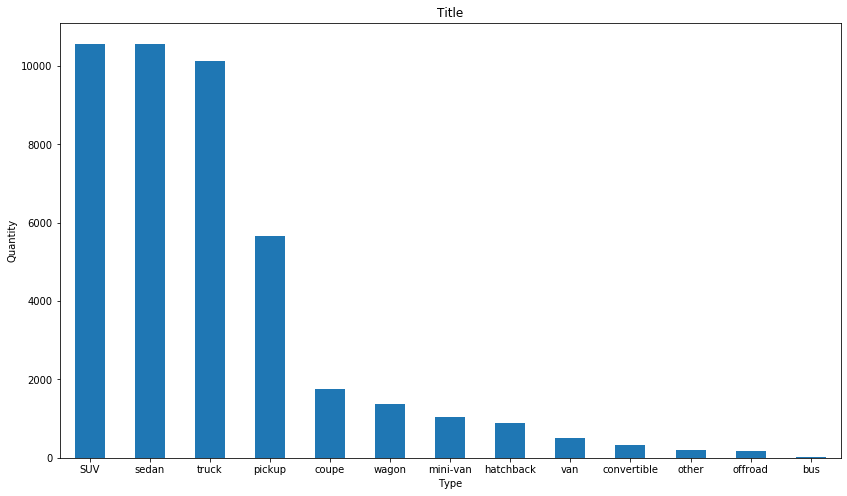

In [56]:
# Reviewer's code

filtered_df['type'].value_counts().plot(kind='bar',title='Total Ads per Type', figsize=(14,8))
plt.xticks(rotation=0)

plt.title('Title')
plt.xlabel('Type')
plt.ylabel('Quantity')
plt.show()

## Price factors

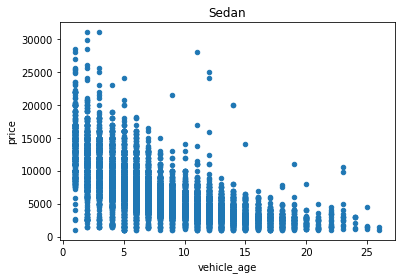

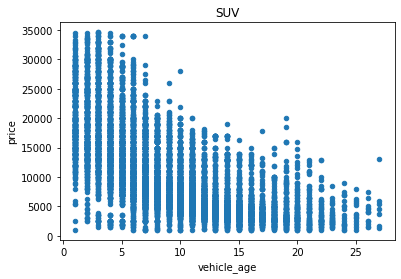

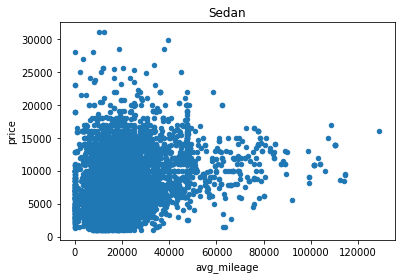

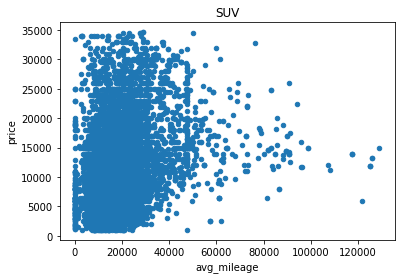

In [57]:
# Quantitative variables

suv_data = filtered_df.query('type == "SUV"')
sedan_data = filtered_df.query('type == "sedan"')

# Automating histograms

factors = ['vehicle_age','avg_mileage']
for i in factors:
    
    sedan_data.plot(kind='scatter',x=i,y='price',title='Sedan')
    suv_data.plot(kind='scatter',x=i,y='price',title='SUV',)
    
    



    
    


                                                                             
                                                         

(0, 15000)

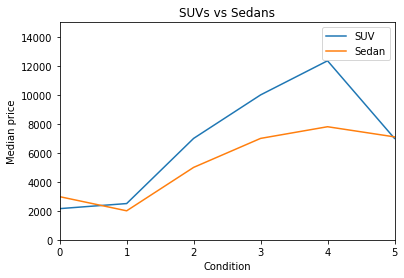

In [58]:
# condition
suv_data.groupby('condition')['price'].median().plot()
sedan_data.groupby('condition')['price'].median().plot()
plt.title('SUVs vs Sedans')
plt.xlabel('Condition')
plt.ylabel('Median price')
plt.legend(labels=['SUV','Sedan'])
plt.ylim(0,15000)

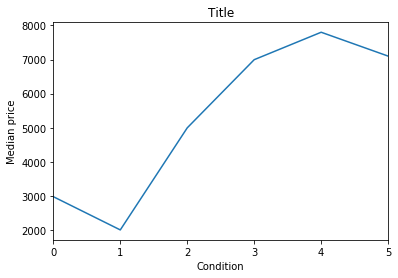

In [59]:
# Reviwer's code

sedan_data.groupby('condition')['price'].median().plot()

plt.title('Title')
plt.xlabel('Condition')
plt.ylabel('Median price')

plt.show()

In [60]:
#Correlation matrix
sedan_data.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,vehicle_age,avg_mileage
price,1.000000,0.696718,0.292745,0.006881,-0.607051,0.123195,0.000133,0.036114,-0.691653,0.339194
model_year,0.696718,1.000000,0.267887,-0.190590,-0.603773,0.025779,0.000684,0.033306,-0.994646,0.537094
condition,0.292745,0.267887,1.000000,-0.068269,-0.292262,0.002568,-0.011600,0.020738,-0.265232,0.073329
cylinders,0.006881,-0.190590,-0.068269,1.000000,0.132880,0.126239,-0.009721,-0.004180,0.189745,-0.098238
odometer,-0.607051,-0.603773,-0.292262,0.132880,1.000000,-0.010727,0.005118,-0.025532,0.599980,0.025110
is_4wd,0.123195,0.025779,0.002568,0.126239,-0.010727,1.000000,0.010354,-0.011214,-0.026889,0.009661
days_listed,0.000133,0.000684,-0.011600,-0.009721,0.005118,0.010354,1.000000,0.013031,0.000665,-0.004926
year_posted,0.036114,0.033306,0.020738,-0.004180,-0.025532,-0.011214,0.013031,1.000000,0.070153,-0.146345
vehicle_age,-0.691653,-0.994646,-0.265232,0.189745,0.599980,-0.026889,0.000665,0.070153,1.000000,-0.551199
avg_mileage,0.339194,0.537094,0.073329,-0.098238,0.025110,0.009661,-0.004926,-0.146345,-0.551199,1.000000


In [61]:
#Correlation matrix
suv_data.corr()


,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,year_posted,vehicle_age,avg_mileage
price,1.000000,0.664095,0.278253,0.038589,-0.589559,0.130648,-0.018251,0.007776,-0.661997,0.332616
model_year,0.664095,1.000000,0.295807,-0.300863,-0.607472,-0.084103,-0.013817,0.024394,-0.995660,0.578660
condition,0.278253,0.295807,1.000000,-0.099887,-0.294059,-0.003910,-0.014573,0.004948,-0.294735,0.081765
cylinders,0.038589,-0.300863,-0.099887,1.000000,0.271995,0.121636,0.020883,-0.008530,0.299503,-0.170483
odometer,-0.589559,-0.607472,-0.294059,0.271995,1.000000,0.030601,0.008799,-0.015927,0.604733,-0.041133
is_4wd,0.130648,-0.084103,-0.003910,0.121636,0.030601,1.000000,-0.006427,-0.012213,0.082792,-0.049752
days_listed,-0.018251,-0.013817,-0.014573,0.020883,0.008799,-0.006427,1.000000,-0.005374,0.013288,-0.017223
year_posted,0.007776,0.024394,0.004948,-0.008530,-0.015927,-0.012213,-0.005374,1.000000,0.068746,-0.121079
vehicle_age,-0.661997,-0.995660,-0.294735,0.299503,0.604733,0.082792,0.013288,0.068746,1.000000,-0.588733
avg_mileage,0.332616,0.578660,0.081765,-0.170483,-0.041133,-0.049752,-0.017223,-0.121079,-0.588733,1.000000


According to the above histograms and correlation matrix, the vehicle age when listed, average mileage, and conditions impact the price of a vehicle the most. There is a negative correlation between the age of the vehicle and the price. The lower the age of the vehicle, the higher the price. There is a positive correlation between condition and price. The better the condition of the vehicle listed, the higher the price.

/opt/conda/lib/python3.7/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


Popular SUV paint colors: 
 black     1851
white     1652
silver    1351
grey      1026
blue       902
red        793
green      380
brown      317
custom     253
orange      69
yellow      40
purple      37
Name: paint_color, dtype: int64

Popular Sedan colors: 
 silver    1805
black     1572
grey      1430
white     1303
blue      1067
red        818
custom     237
brown      231
green      180
purple      23
yellow      18
orange       6
Name: paint_color, dtype: int64


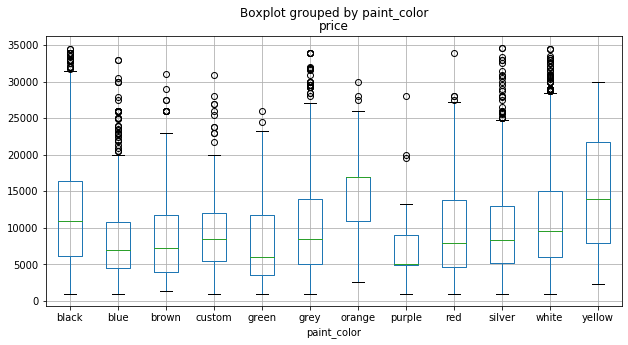

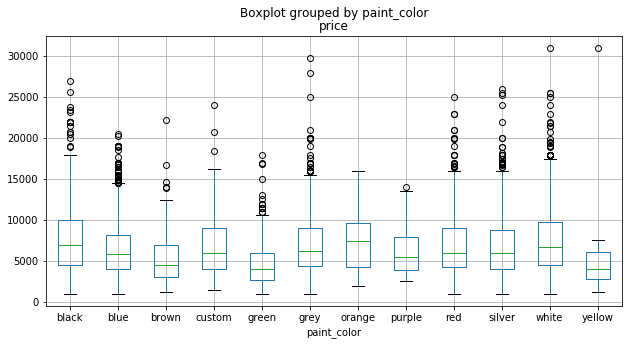

In [62]:

# Categorical variables    
suv_data.paint_color.dropna(inplace=True)
sedan_data.paint_color.dropna(inplace=True)

# Ignore warnings
warnings.filterwarnings('ignore')

# Plotting boxplots for paint color and price
suv_data.boxplot(by='paint_color',column=['price'],figsize= (10,5))
sedan_data.boxplot(by='paint_color',column=['price'],figsize=(10,5))

# Compare value counts

print("Popular SUV paint colors:",'\n',suv_data.paint_color.value_counts())
print()
print('Popular Sedan colors:','\n',sedan_data.paint_color.value_counts())






The distributions among paint colors are most likely random. Orange or other bright colors are the most expensive on average.  A reason for this may be that sport cars tend to have be brighter colors. Automatic transmissions are the most popular transmission among cars listed. Automatic transmissions are more expensive for sedans, however manual is more expensive for SUV's.


Popular SUV transmission types: 
 automatic    10042
manual         439
other           87
Name: transmission, dtype: int64

Popular SUV transmission types: 
 automatic    9987
manual        512
other          68
Name: transmission, dtype: int64


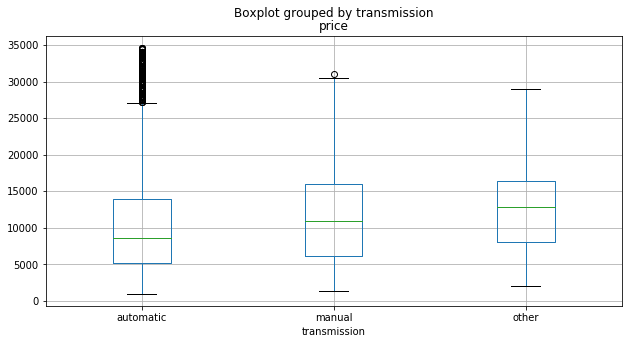

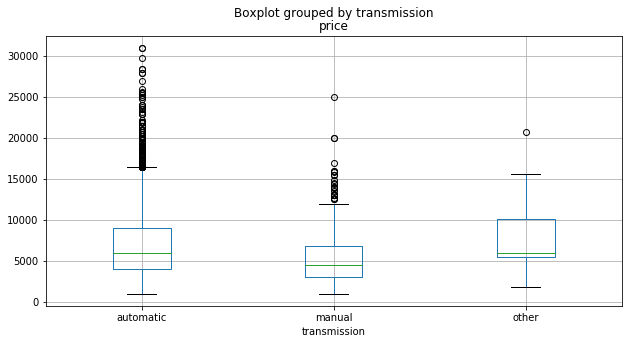

In [63]:
# Transmission
suv_data.boxplot(by='transmission',column=['price'],figsize= (10,5))
sedan_data.boxplot(by='transmission',column=['price'],figsize=(10,5))

# Transmission value counts
print("Popular SUV transmission types:",'\n', suv_data.transmission.value_counts())
print()
print("Popular SUV transmission types:",'\n',sedan_data.transmission.value_counts())

## General conclusion


After studying the general information, there were missing values in multiple columns. The is_4wd column contains the most missing values with about half of the total entries. The is_4wd column consisted of  Boolean values. If a Boolean field contains only True (or 1) values, it's reasonable to assume that the missing values are False or 0. Therefore the missing 'is_4wd' column values were  filled with 0s. The percentage of missing values in the 'cylinders' colummn was 7% and missing values in 'model_year' is 11%, which is insignificant so they were dropped. The odometer column was filled in using the average value per model_year. Columns with float datatypes were converted to int64 in order to save memory.

The vehicle's age (in years) when the ad was placed and average mileage per year were calculated and added to the table.In the condition column, the string values were replaced with a numeric scale. The following parameters: price, vehicle's age when the ad was
placed, mileage, number of cylinders, and condition were analyzed and histograms plotted of each.The histograms with or without outliers seem to be very similar, with almost identical peaks.

According to the analysis, vehicles that are listed for more than 150 days are rare and at around 200 days the histogram zeroes out. The average amount of days listed is about 40 days. Sedans and SUV's are the most popular type of vehicle listed. According to the above histograms and correlation matrix, the vehicle age when listed and average mileage impact price the most.

The distributions among paint colors are most likely random. Orange or other bright colors are the most expensive on average.  A reason for this may be that sport cars tend to have be brighter colors. Automatic transmissions are the most popular transmission among cars listed. Automatic transmissions are more expensive for sedans, however manual is more expensive for SUV's.





